In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(12)

,id,qid1,qid2,question1,question2,is_duplicate
144920,144920,229239,31859,What are the best places for vacation in USA?,What is the best spot for a vacation in the wo...,0
83594,83594,141482,141483,What are the marker less augmented reality exa...,What is the best OS environment for Android ap...,0
310989,310989,10566,67593,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1
107016,107016,176161,176162,Why can't junk foods be banned?,Should we ban junk food?,0
72666,72666,124809,124810,What is the best university for studying in bi...,Why does it seem impossible to find a suitable...,0
89534,89534,19546,1182,Can we time travel?,How is time travel possible?,1
20396,20396,38480,38481,Why is the Quora community so anti-Donald Trump?,Why is Quora so antiTrump?,1
219936,219936,326935,326936,"I am 23 and single, I feel like I am ready for...","I hate people, I don't like girls even though ...",0
268421,268421,45205,213165,How does the stock market work? Who decides th...,What is STOCK MARKET? How does it work?,1
103924,103924,171660,171661,What are the various RBI exams?,What is the RBI exam?,1


In [4]:
df.shape

(404290, 6)

There are 4 lakh rows. Each row has two questions. So, a total of 8 lakh questions are present.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Since, we cannot take all the 4 lakhs rows, I am only taking random 1 lakh rows.

In [6]:
new_df = df.sample(50000,random_state=12)

In [7]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1
169568,169568,187323,74117,Why should I not vote for Trump? (Someone aske...,Why should I not vote for Trump?,1
345040,345040,473326,473327,What is the best RZA verse?,What are the craziest rap verses?,0
30329,30329,56030,56031,Which programming languages should have to lea...,What programming language should I learn for m...,1
...,...,...,...,...,...,...
204760,204760,307754,307755,Is it true that continental drift is fake?,Is the idea true that continental drift is a h...,1
162810,162810,202939,253393,Why do some women shave their eyebrows and pai...,How do I hide a shaved eyebrow?,0
126921,126921,204447,204448,Why don't airline beverages have lids in case ...,Why don't airlines use lids for their coffee?,1
106157,106157,174920,32452,How can I improve my vocabulary?,How can I improve my English vocabulary?,1


In [8]:
new_df.shape

(50000, 6)

In [9]:
# duplicate rows
new_df.duplicated().sum()

0

In [10]:
# count of duplicated and non-duplicated rows
print(new_df["is_duplicate"].value_counts())
print((new_df["is_duplicate"].value_counts()/new_df['is_duplicate'].count())*100 )

0    31600
1    18400
Name: is_duplicate, dtype: int64
0    63.2
1    36.8
Name: is_duplicate, dtype: float64


<Axes: >

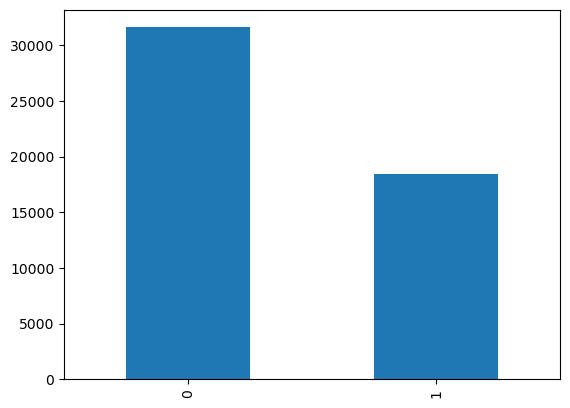

In [11]:
new_df["is_duplicate"].value_counts().plot(kind  = "bar")

 An imbalance in the labelling is present in the data. That is, 63k rows are labelled not duplicated and 37k are labelled duplicated.

In [12]:
#Repeated quesion
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])


Number of unique questions 88989
Number of questions getting repeated 7376


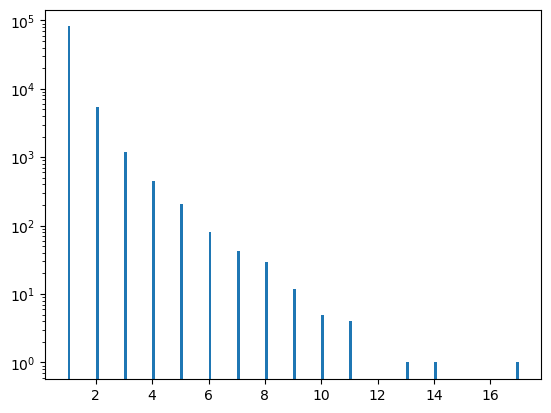

In [13]:
#Repeated questons histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

There are question which has repeated around 37, 36, 27, 20, 15, etc

## Now we doing some feature engineering 
#### Length of each questions in each row:
                q1_len = lenght of question1
                q2_len = length of question2

In [14]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [15]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0,43,40
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1,27,66


#### Count of words in each questions in each row:
            q1_num_words = count of words in question1
            q2_num_words = count of words in question2

In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda ques:len(ques.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda ques:len(ques.split()))

In [17]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0,43,40,8,8
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1,27,66,4,10


#### Number of common words in question1 and question2 = len_comm_wrd

In [18]:
def common(row):
    w1 = set(map(lambda x: x.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda x: x.lower().strip(),row['question2'].split()))
    return len(w1 & w2)

In [19]:
new_df['word_common'] = new_df.apply(common, axis=1)


In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0,43,40,8,8,5
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1,27,66,4,10,4
169568,169568,187323,74117,Why should I not vote for Trump? (Someone aske...,Why should I not vote for Trump?,1,95,32,19,7,7
345040,345040,473326,473327,What is the best RZA verse?,What are the craziest rap verses?,0,27,33,6,6,2
30329,30329,56030,56031,Which programming languages should have to lea...,What programming language should I learn for m...,1,69,61,10,9,6


#### Length of word1 +word2 = len_total_words

In [21]:
def total_words(row):
    w1 = set(map(lambda x : x.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda x : x.lower().strip(),row['question2'].split()))
    return len(w1) + len(w2)

In [22]:
new_df['word_total'] = new_df.apply(total_words, axis =1)

In [23]:
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0,43,40,8,8,5,16
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1,27,66,4,10,4,14
169568,169568,187323,74117,Why should I not vote for Trump? (Someone aske...,Why should I not vote for Trump?,1,95,32,19,7,7,25


#### Ratio of common word to total number of words

In [24]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
162260,162260,252637,78559,How can I accomplish more every single day?,How do I get motivated every single day?,0,43,40,8,8,5,16,0.31
300139,300139,422897,422898,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...,1,27,66,4,10,4,14,0.29
169568,169568,187323,74117,Why should I not vote for Trump? (Someone aske...,Why should I not vote for Trump?,1,95,32,19,7,7,25,0.28
345040,345040,473326,473327,What is the best RZA verse?,What are the craziest rap verses?,0,27,33,6,6,2,12,0.17
30329,30329,56030,56031,Which programming languages should have to lea...,What programming language should I learn for m...,1,69,61,10,9,6,19,0.32


## Analysis of newly added features

minimum characters 1
maximum characters 623
average num of characters 59


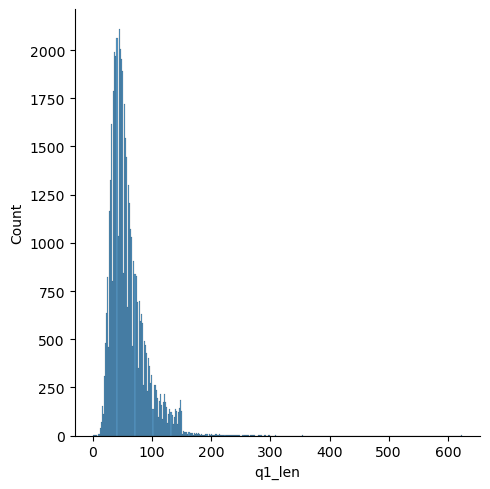

In [25]:
# Analysis of q1_len features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

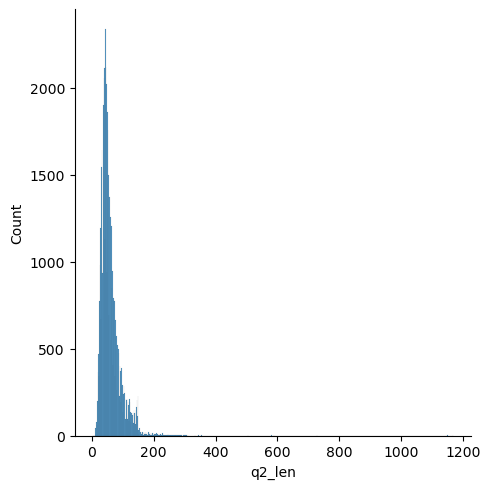

In [26]:
sns.displot(new_df['q2_len'])

minimum words 1
maximum words 125
average num of words 10


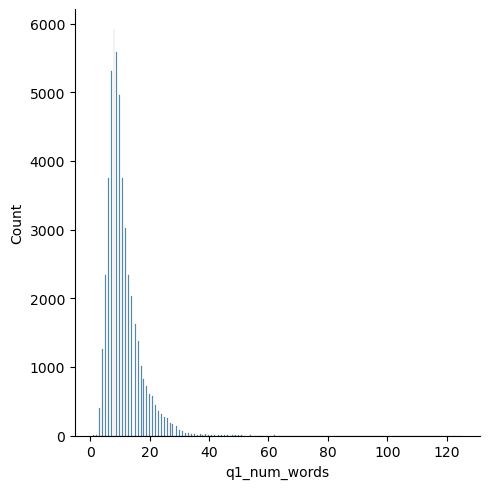

In [27]:
sns.displot(new_df["q1_num_words"])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

Minimun number: 1
Maximum number: 237
Average number: 11.13512


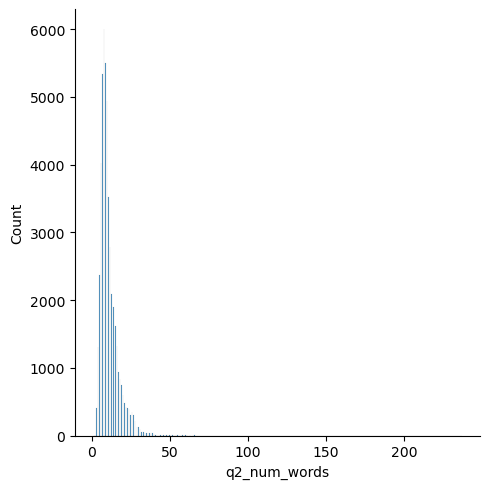

In [28]:
sns.displot(new_df["q2_num_words"])
print("Minimun number:", new_df["q2_num_words"].min())
print("Maximum number:", new_df["q2_num_words"].max())
print("Average number:", new_df["q2_num_words"].mean())

In [29]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
162260,How can I accomplish more every single day?,How do I get motivated every single day?
300139,How does GravityLight work?,How does GravityLight (From Deciwatt) work? Wh...
169568,Why should I not vote for Trump? (Someone aske...,Why should I not vote for Trump?
345040,What is the best RZA verse?,What are the craziest rap verses?
30329,Which programming languages should have to lea...,What programming language should I learn for m...


In [30]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
162260,0,43,40,8,8,5,16,0.31
300139,1,27,66,4,10,4,14,0.29
169568,1,95,32,19,7,7,25,0.28
345040,0,27,33,6,6,2,12,0.17
30329,1,69,61,10,9,6,19,0.32


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [32]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
162260,0,43,40,8,8,5,16,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
300139,1,27,66,4,10,4,14,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
169568,1,95,32,19,7,7,25,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
345040,0,27,33,6,6,2,12,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
30329,1,69,61,10,9,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X = final_df.iloc[:,1:].values
y = final_df.iloc[:,0].values

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7758

In [37]:
from xgboost import XGBClassifier


In [39]:
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


0.7709

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()

In [44]:
log.fit(X_train,y_train)

/Users/fathimab/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = log.predict(X_test)
accuracy_score(y_test,y_pred)

0.7375